Our main aim is to learn the given classfication example and train a model todo binaary classification.
We create a  matrix "X" which stores the input features x1,x2 along with a column of 1 to accomodate constants. The vector "y" stores the output datas. We assume a parameter vector theta which will conatain the final weights. Our algorithm eventually predicts final parameters such that a weighted sum of the input features and predicted parameters can be used to make predictions about the class of a data. The prediction is mapped to the probability of the data belonging to class 1 by the sigmoid function, which taked as input the weighted sum mentioned above. When the input is positive then the output of the logistic function is greater than 0.5 and we classify it to be of class 1 else class 0.
We are using gradient descent which learns the opitimum parameters to minimize the  "Log-Loss Function". We update our parameters after every iteration,after getting the final parameters we classify according to the probability!



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data=pd.read_csv('logistic_data.txt',header=None)               #loading the txt file

In [8]:
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [9]:
data.describe()                     #describing the dataframe to know all about it

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [10]:
x1=data.iloc[:,0].to_numpy()
x2=data.iloc[:,1].to_numpy()
y=data.iloc[:,2].to_numpy()


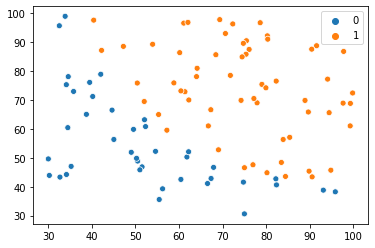

In [11]:
import seaborn as sns                                       #to plot the scatter plot with different labels
sns.scatterplot(x1,x2,hue=y)

In [12]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
y.reshape(-1)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
x1=(x1-np.amin(x1))/np.ptp(x1)
x2=(x2-np.amin(x2))/np.ptp(x2)                        #normalising both features to avoid the dominance of a particukar one

We define the sigmoid function which  gives the probability of a given data to be in class 0 or 1. When z>0, s(z)>0.5 so in "1" and when z<0 in "0" as s(z) < 0.5.

In [15]:
def sigmoid(x):                                          #sigmoid is the the prediced value
    return 1/(1+np.exp(-x))                              #boundary case not included

We create our design matrix "X"

In [23]:
f = 2  
X=np.ones((100,2))              #no of features
X[:,0]=x1
X[:,1]=x2                         #we have made the input array                                                       

In [36]:
def log_loss(X,b,y,theta):                             #LOSS FUNCTION DEFINITION
    n=len(y)
    h=sigmoid(np.dot(X,theta)+b)
    return -1/n*(np.dot(y,np.log(h))+np.dot(1-y,np.log(1-h)))
    

Gradient descent algorithm. The parameters get modified at every iteration till they converge,Thus we effectively minimise the loss function.

In [53]:
def grad_descent(X,b,y,theta,rate,iters):
    m=len(y)
    J=1
    dw=0
    db=0
    for i in range(iters):
        Z = np.dot(theta,X.T) + b 
        A = 1 / (1 + np.exp(-Z))                  
        dz = A - y                                     
        dw=np.dot(X.T, dz) / m
        theta=theta-rate*dw
        db = dz.sum() / m 
        b=b-rate*db
        J+=(log_loss(X,b,y,theta))*1/m   
        
    return (J,theta,b)

We set the no of iteration the algorithm will run and the learning rate. We also initialise the parameters theta to zero initially.

In [72]:
n_iter=20000                             #NO OF ITERATIONS
l_rate=0.01                               #LEARNING RATE
theta=np.zeros(f)                      #INTIAL PARAMETERS
b=0


In [73]:
(J_hist,param,b)=grad_descent(X,b,y,theta,l_rate,n_iter)

In [74]:
print(param,b)

[4.86790386 4.37905527] -4.04183896313974


In [75]:
J_hist                            #average value of the cost function which was minimizedd

81.25452851643998

Plot a curve to show the convergence of the loss function as a function of the iterations of the gradient descent algorithm

x and y axis are the 2 inout values. We also plot a decision boundary to show the predicted linee between the classes. The decision boundary is found by the line where probability of a data belonging to either of the classes is same i.e 0.5 each . It comes out to be a straight line in our case with our assumptions taken earlier as the input value fed to the hypothesis was a linear combination of the input features.

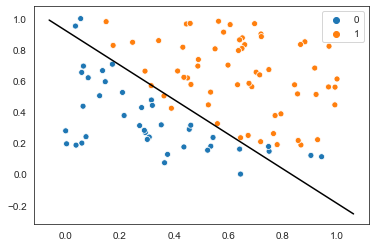

In [76]:
slope = -(param[0] / param[1])
intercept = -(b/ param[1])

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

Predicting whether we given data belongs to class 0 or class 1 by using the optimal parameters learned and calculating the probabilty by using the sigmoid function. If the probability of getting class 1 is greater than 0.5 we label it to be belonging to class 1. If not then it is predicted to be belonging to class 0.

In [77]:
def predict(X,param):
    return np.round(sigmoid(np.dot(X,param)))

In [78]:
y_pred=predict(X,param)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

We calculate the accuracy of our prediction by dividing the no of correct predictions by the total no of observations.

In [79]:
score = float(sum(y_pred == y))/ float(len(y))                 #the accuracy of our laerned model for the inputs!
print(score)

0.6
